In [65]:
import pandas as pd

df_excess = pd.read_csv("estimated-cumulative-excess-deaths-per-100000-people-during-covid-19.csv")
df_excess.head()

,Entity,Day,"Cumulative excess deaths per 100,000 people (central estimate)","Cumulative excess deaths per 100,000 people (95% CI, lower bound)","Cumulative excess deaths per 100,000 people (95% CI, upper bound)","Total confirmed deaths due to COVID-19 per 100,000 people"
0,Afghanistan,2020-01-01,-0.022148,-0.289158,0.420465,NaN
1,Afghanistan,2020-01-06,-0.044295,-0.570486,0.848026,0.0
2,Afghanistan,2020-01-13,-0.047579,-0.837293,1.281982,0.0
3,Afghanistan,2020-01-20,0.022123,-1.125014,1.698806,0.0
4,Afghanistan,2020-01-27,0.063374,-1.377656,2.177791,0.0


In [66]:
eu_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia",
    "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia",
    "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania",
    "Slovakia", "Slovenia", "Spain", "Sweden"
]

df_eu_excess = df_excess[df_excess["Entity"].isin(eu_countries)]


In [67]:
print(df_excess.columns)


Index(['Entity', 'Day',
       'Cumulative excess deaths per 100,000 people (central estimate)',
       'Cumulative excess deaths per 100,000 people (95% CI, lower bound)',
       'Cumulative excess deaths per 100,000 people (95% CI, upper bound)',
       'Total confirmed deaths due to COVID-19 per 100,000 people'],
      dtype='object')


In [68]:
df_eu_excess = df_eu_excess[[
    "Entity", "Day", 
    "Cumulative excess deaths per 100,000 people (central estimate)"
]]


In [73]:
df_eu_excess.head()

,Entity,Day,"Cumulative excess deaths per 100,000 people (central estimate)"
30072,Austria,2020-01-01,0.000000
30073,Austria,2020-01-06,0.000000
30074,Austria,2020-01-13,0.000000
30075,Austria,2020-01-20,0.000000
30076,Austria,2020-01-27,1.050525


In [74]:
df_eu_excess["Day"] = pd.to_datetime(df_eu_excess["Day"])


df_eu_excess["Year"] = df_eu_excess["Day"].dt.year


df_excess_yearly = df_eu_excess.groupby(["Entity", "Year"])[
    "Cumulative excess deaths per 100,000 people (central estimate)"
].mean().reset_index()


df_excess_yearly.rename(columns={
    "Entity": "Country",
    "Cumulative excess deaths per 100,000 people (central estimate)": "Excess Deaths"
}, inplace=True)


In [75]:
df_excess_yearly.head()

,Country,Year,Excess Deaths
0,Austria,2020,18.075639
1,Austria,2021,120.564786
2,Austria,2022,223.249945
3,Austria,2023,319.586097
4,Austria,2024,365.247658


In [77]:
df_unemp = pd.read_csv("Unemployment_EU_Countries.csv")
df_unemp.columns

Index(['Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [80]:
df_unemp_melted = df_unemp.melt(
    id_vars="Country Name",
    var_name="Year",
    value_name="Unemployment Rate"
)


df_unemp_melted.rename(columns={"Country Name": "Country"}, inplace=True)


df_unemp_melted["Year"] = df_unemp_melted["Year"].astype(int)

df_unemp.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Austria,4.687,4.007,4.852,4.779,5.969,5.682,5.320,4.909,4.198,...,5.674,5.802,6.064,5.561,4.933,4.560,5.201,6.459,4.992,5.264
1,Belgium,6.586,6.178,6.910,7.680,7.363,8.440,8.246,7.459,6.976,...,8.523,8.482,7.830,7.090,5.941,5.364,5.545,6.248,5.570,5.528
2,Bulgaria,16.218,19.921,18.110,13.733,12.037,10.083,8.951,6.878,5.609,...,11.424,9.143,7.575,6.164,5.211,4.230,5.125,5.267,4.268,4.319
3,Cyprus,4.766,4.043,3.336,4.153,4.770,5.481,4.593,3.946,3.756,...,16.277,15.026,13.006,11.155,8.504,7.155,7.755,7.513,6.806,6.098
4,Germany,7.917,7.773,8.482,9.779,10.727,11.193,10.277,8.732,7.508,...,4.979,4.612,4.104,3.781,3.384,3.163,3.881,3.594,3.120,3.068


In [82]:
merged_df = pd.merge(
    df_unemp_melted,
    df_excess_yearly,
    on=["Country", "Year"],
    how="inner"
)
merged_df.head()


,Country,Year,Unemployment Rate,Excess Deaths
0,Austria,2020,5.201,18.075639
1,Belgium,2020,5.545,63.223992
2,Bulgaria,2020,5.125,25.085758
3,Cyprus,2020,7.755,9.395644
4,Germany,2020,3.881,1.192613


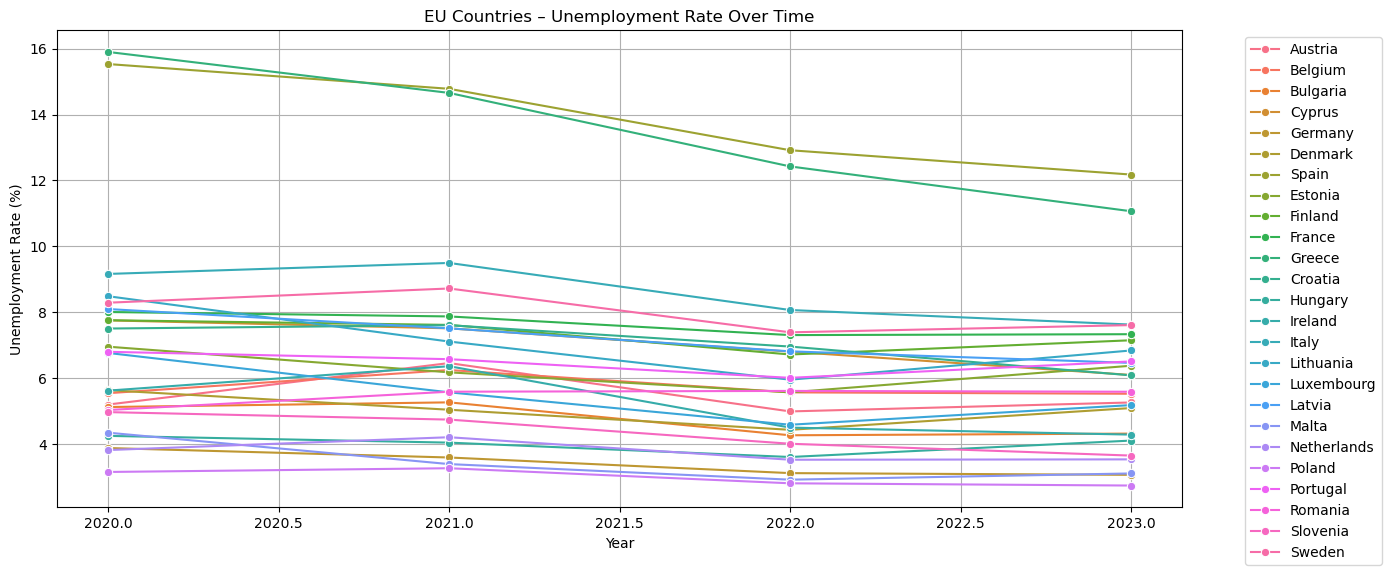

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Unemployment
sns.lineplot(data=merged_df, x="Year", y="Unemployment Rate", hue="Country", marker="o")
plt.title("EU Countries – Unemployment Rate Over Time")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


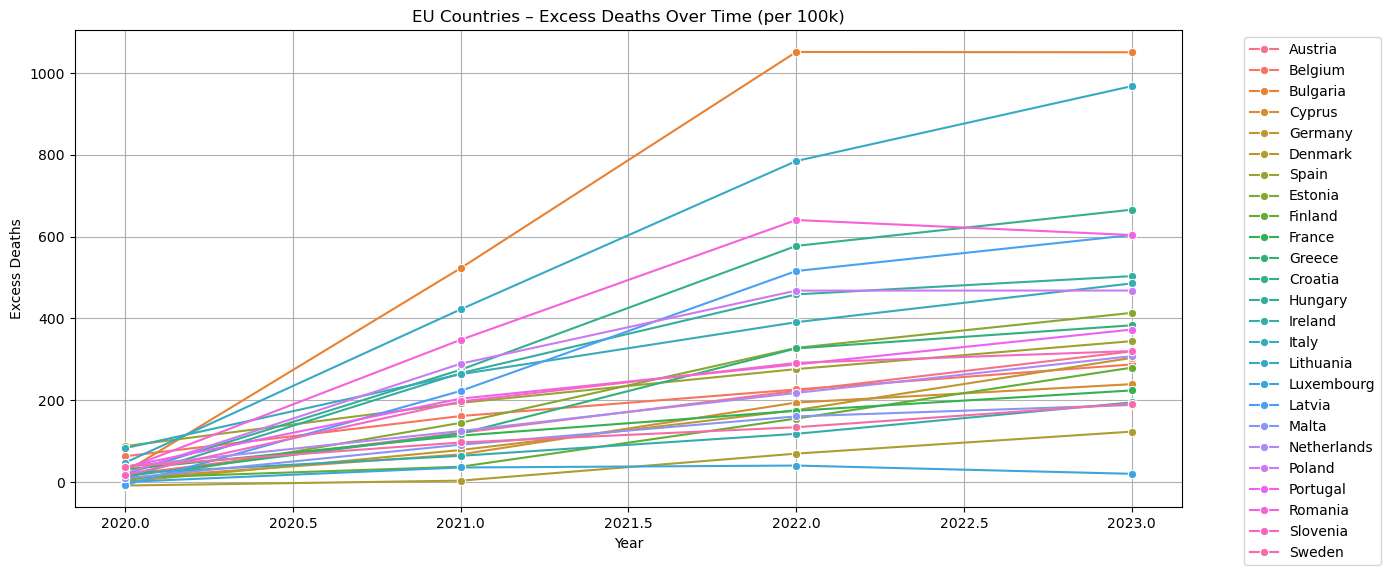

In [86]:
plt.figure(figsize=(14, 6))

# Excess Deaths
sns.lineplot(data=merged_df, x="Year", y="Excess Deaths", hue="Country", marker="o")
plt.title("EU Countries – Excess Deaths Over Time (per 100k)")
plt.ylabel("Excess Deaths")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


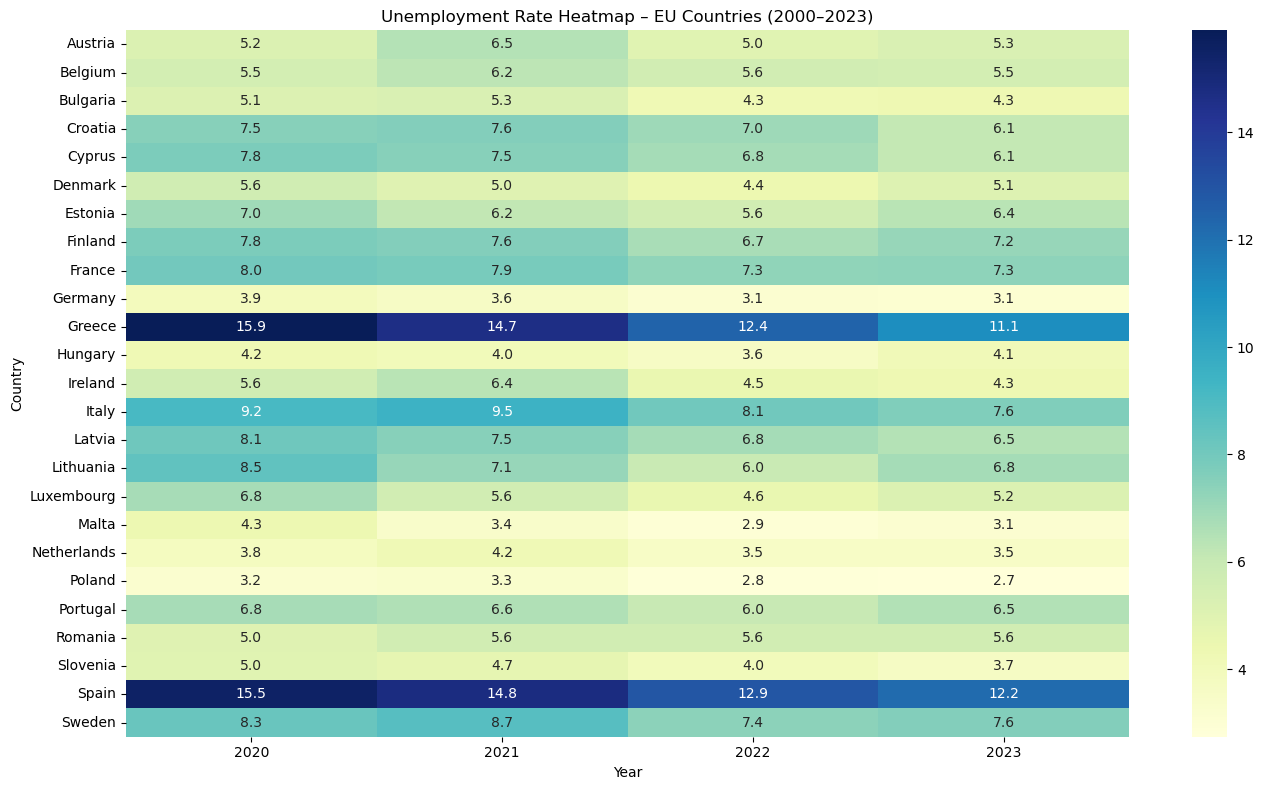

In [87]:
unemp_pivot = merged_df.pivot_table(
    index="Country",
    columns="Year",
    values="Unemployment Rate"
)

plt.figure(figsize=(14, 8))
sns.heatmap(unemp_pivot, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Unemployment Rate Heatmap – EU Countries (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


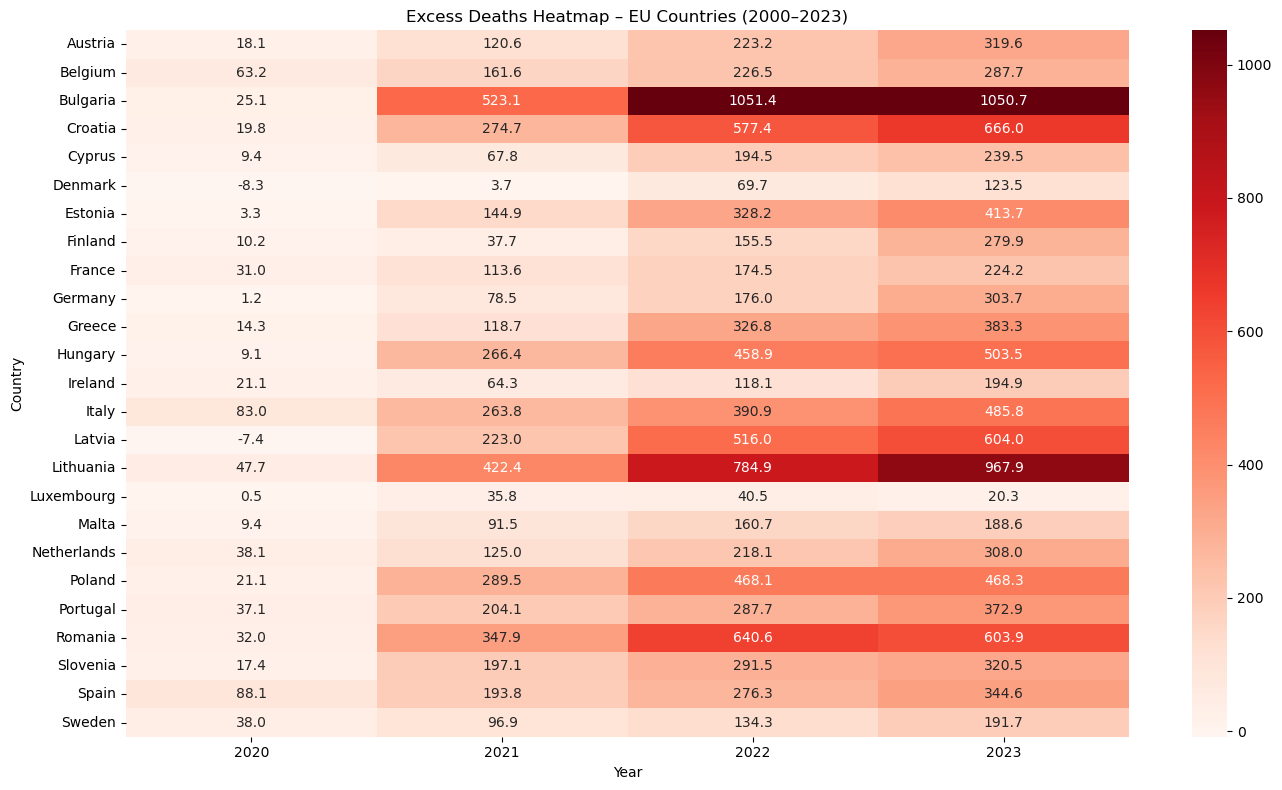

In [88]:
excess_pivot = merged_df.pivot_table(
    index="Country",
    columns="Year",
    values="Excess Deaths"
)

plt.figure(figsize=(14, 8))
sns.heatmap(excess_pivot, cmap="Reds", annot=True, fmt=".1f")
plt.title("Excess Deaths Heatmap – EU Countries (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [89]:
import numpy as np

# unemployment per excessive death
merged_df["Unemp_per_Death"] = merged_df["Unemployment Rate"] / merged_df["Excess Deaths"]


In [90]:
merged_df["Unemp_per_Death"] = merged_df["Unemp_per_Death"].replace([np.inf, -np.inf], np.nan)
merged_df = merged_df.dropna(subset=["Unemp_per_Death"])


In [91]:
merged_df[["Country", "Year", "Unemployment Rate", "Excess Deaths", "Unemp_per_Death"]].head(10)


,Country,Year,Unemployment Rate,Excess Deaths,Unemp_per_Death
0,Austria,2020,5.201,18.075639,0.287735
1,Belgium,2020,5.545,63.223992,0.087704
2,Bulgaria,2020,5.125,25.085758,0.204299
3,Cyprus,2020,7.755,9.395644,0.825382
4,Germany,2020,3.881,1.192613,3.254199
5,Denmark,2020,5.637,-8.322041,-0.677358
6,Spain,2020,15.532,88.068767,0.176362
7,Estonia,2020,6.956,3.261988,2.132442
8,Finland,2020,7.759,10.165095,0.763298
9,France,2020,8.009,30.957395,0.258710


In [93]:
print(merged_df.columns)
print(merged_df.dtypes)


Index(['Country', 'Year', 'Unemployment Rate', 'Excess Deaths',
       'Unemp_per_Death'],
      dtype='object')
Country               object
Year                   int32
Unemployment Rate    float64
Excess Deaths        float64
Unemp_per_Death      float64
dtype: object


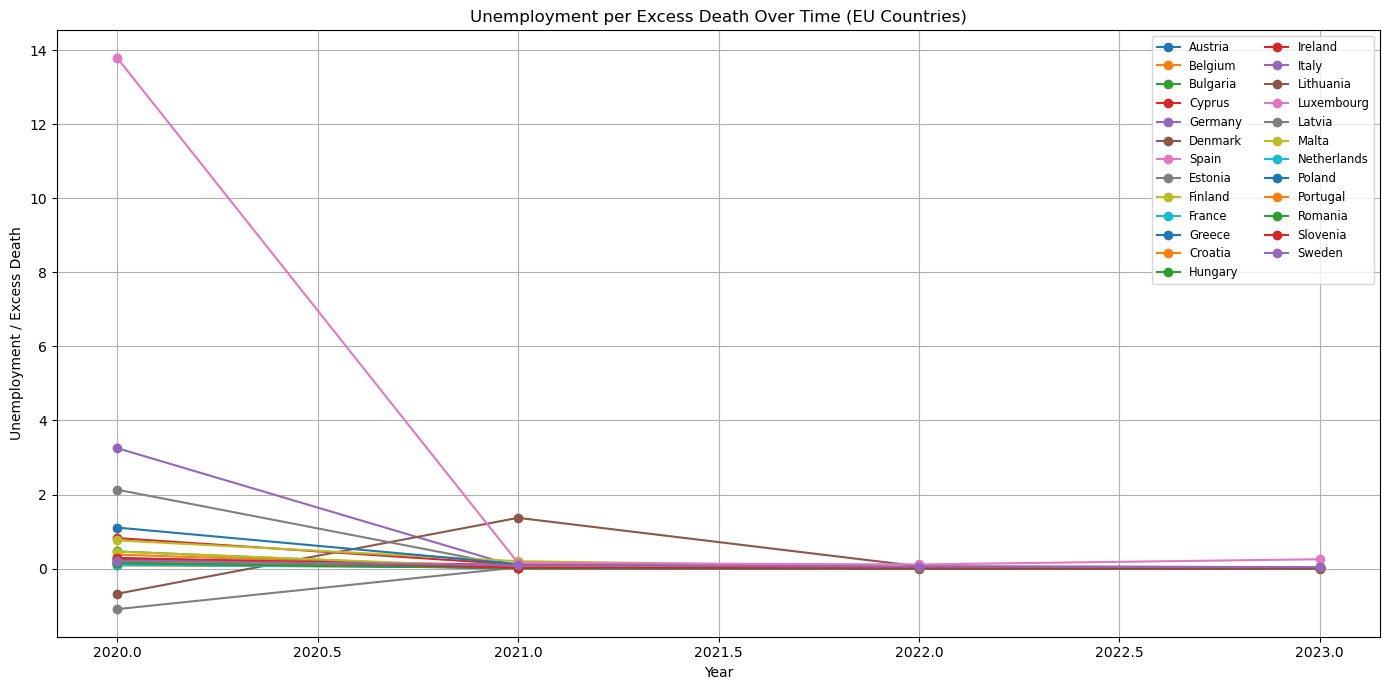

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

for country in merged_df["Country"].unique():
    country_data = merged_df[merged_df["Country"] == country]
    plt.plot(
        country_data["Year"],
        country_data["Unemp_per_Death"],
        marker='o',
        label=country
    )

plt.title("Unemployment per Excess Death Over Time (EU Countries)")
plt.xlabel("Year")
plt.ylabel("Unemployment / Excess Death")
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()


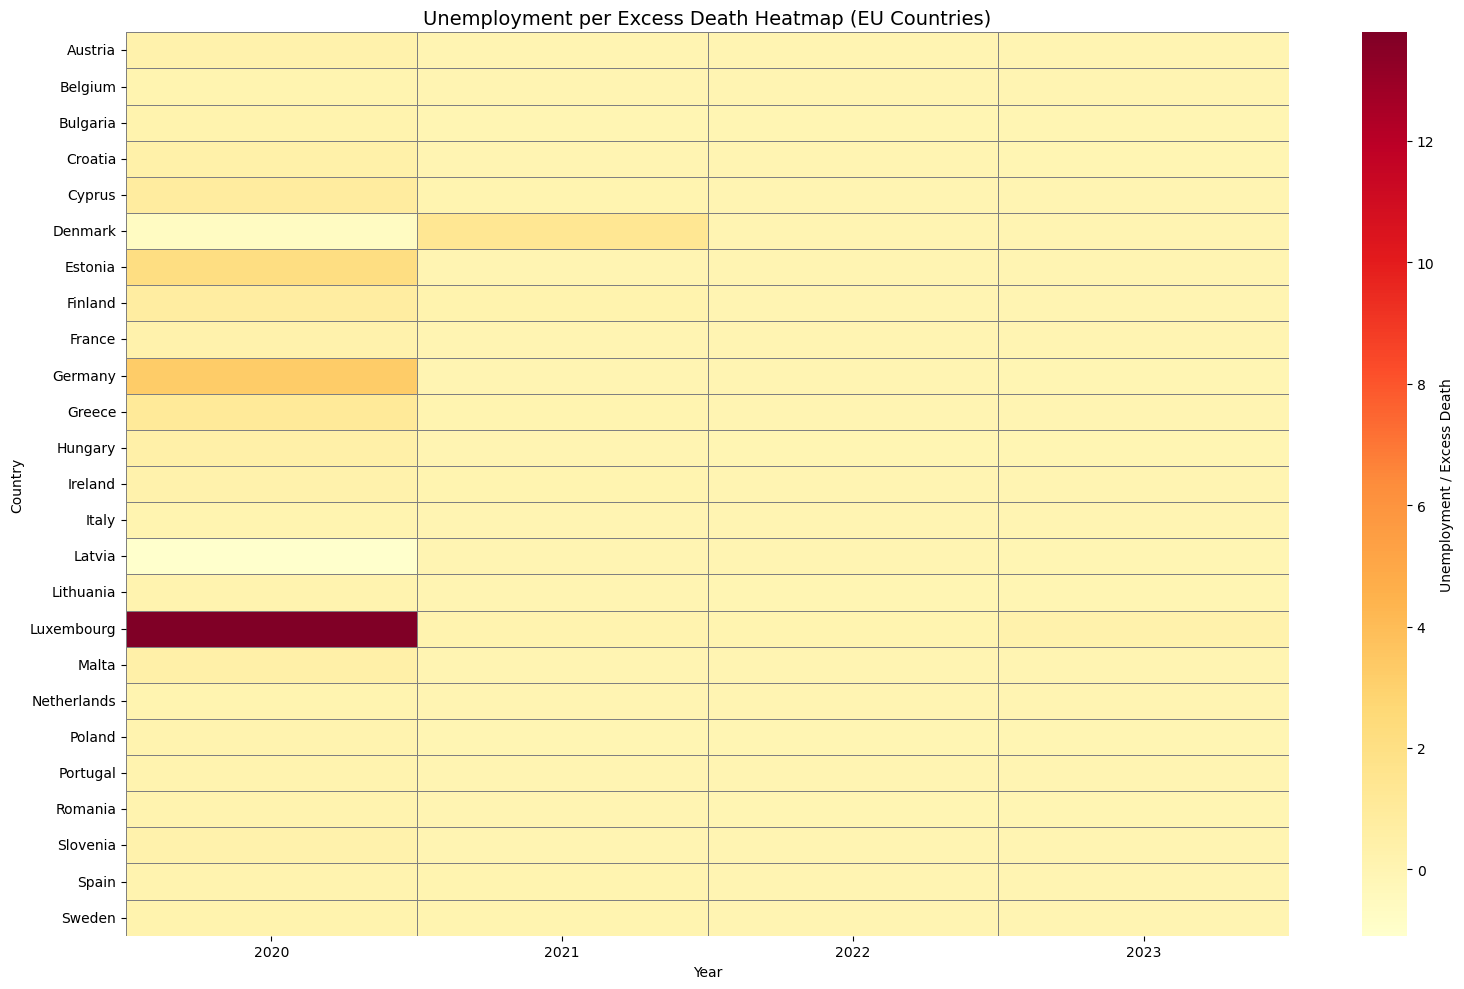

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot tablo oluştur
heatmap_data = merged_df.pivot(index="Country", columns="Year", values="Unemp_per_Death")

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=False, cmap="YlOrRd", linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Unemployment / Excess Death'})
plt.title("Unemployment per Excess Death Heatmap (EU Countries)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [99]:
netherlands_df = merged_df[merged_df["Country"] == "Netherlands"]
netherlands_df.head()

,Country,Year,Unemployment Rate,Excess Deaths,Unemp_per_Death
19,Netherlands,2020,3.820,38.148502,0.100135
44,Netherlands,2021,4.209,124.961458,0.033682
69,Netherlands,2022,3.526,218.118725,0.016166
94,Netherlands,2023,3.537,307.960444,0.011485


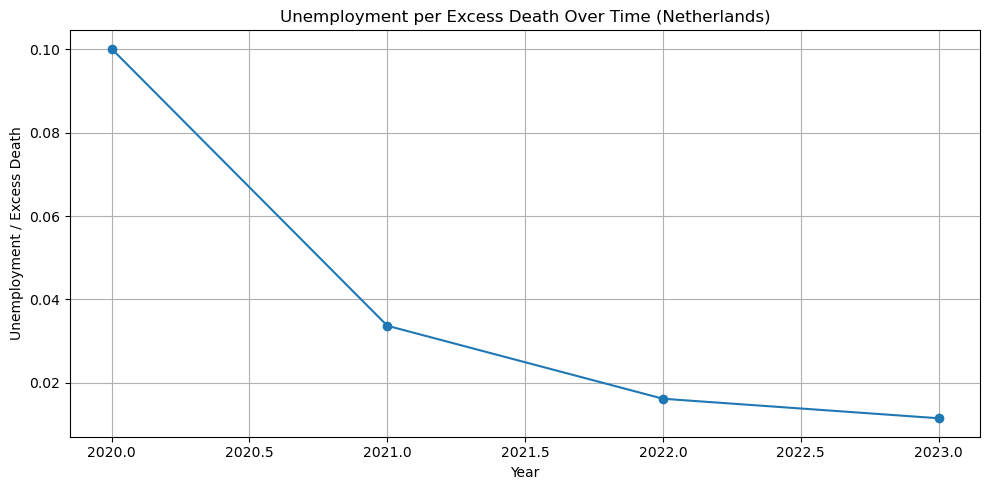

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(netherlands_df["Year"], netherlands_df["Unemp_per_Death"], marker='o')
plt.title("Unemployment per Excess Death Over Time (Netherlands)")
plt.xlabel("Year")
plt.ylabel("Unemployment / Excess Death")
plt.grid(True)
plt.tight_layout()
plt.show()


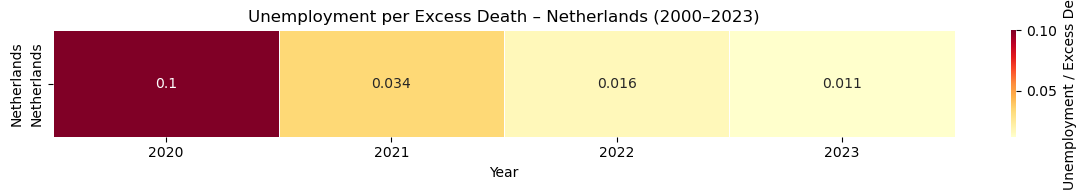

In [103]:
# Heatmap için pivot tablo (tek ülke olduğu için index = y ekseni “dummy” sabit tutulabilir)
nl_heatmap_data = netherlands_df.pivot(index="Country", columns="Year", values="Unemp_per_Death")

plt.figure(figsize=(12, 2))
sns.heatmap(nl_heatmap_data, annot=True, cmap="YlOrRd", linewidths=0.5, cbar_kws={'label': 'Unemployment / Excess Death'})
plt.title("Unemployment per Excess Death – Netherlands (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Netherlands")
plt.tight_layout()
plt.show()


In [105]:
merged_df.to_csv("eu_unemp_covid_dashboard.csv", index=False)
